In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importation des données

In [3]:
data = pd.read_csv('/Users/morganjowitt/Desktop/MOSEF/scoring/Projet_scoring/data/hmeq.csv')
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


# Distribution des variables

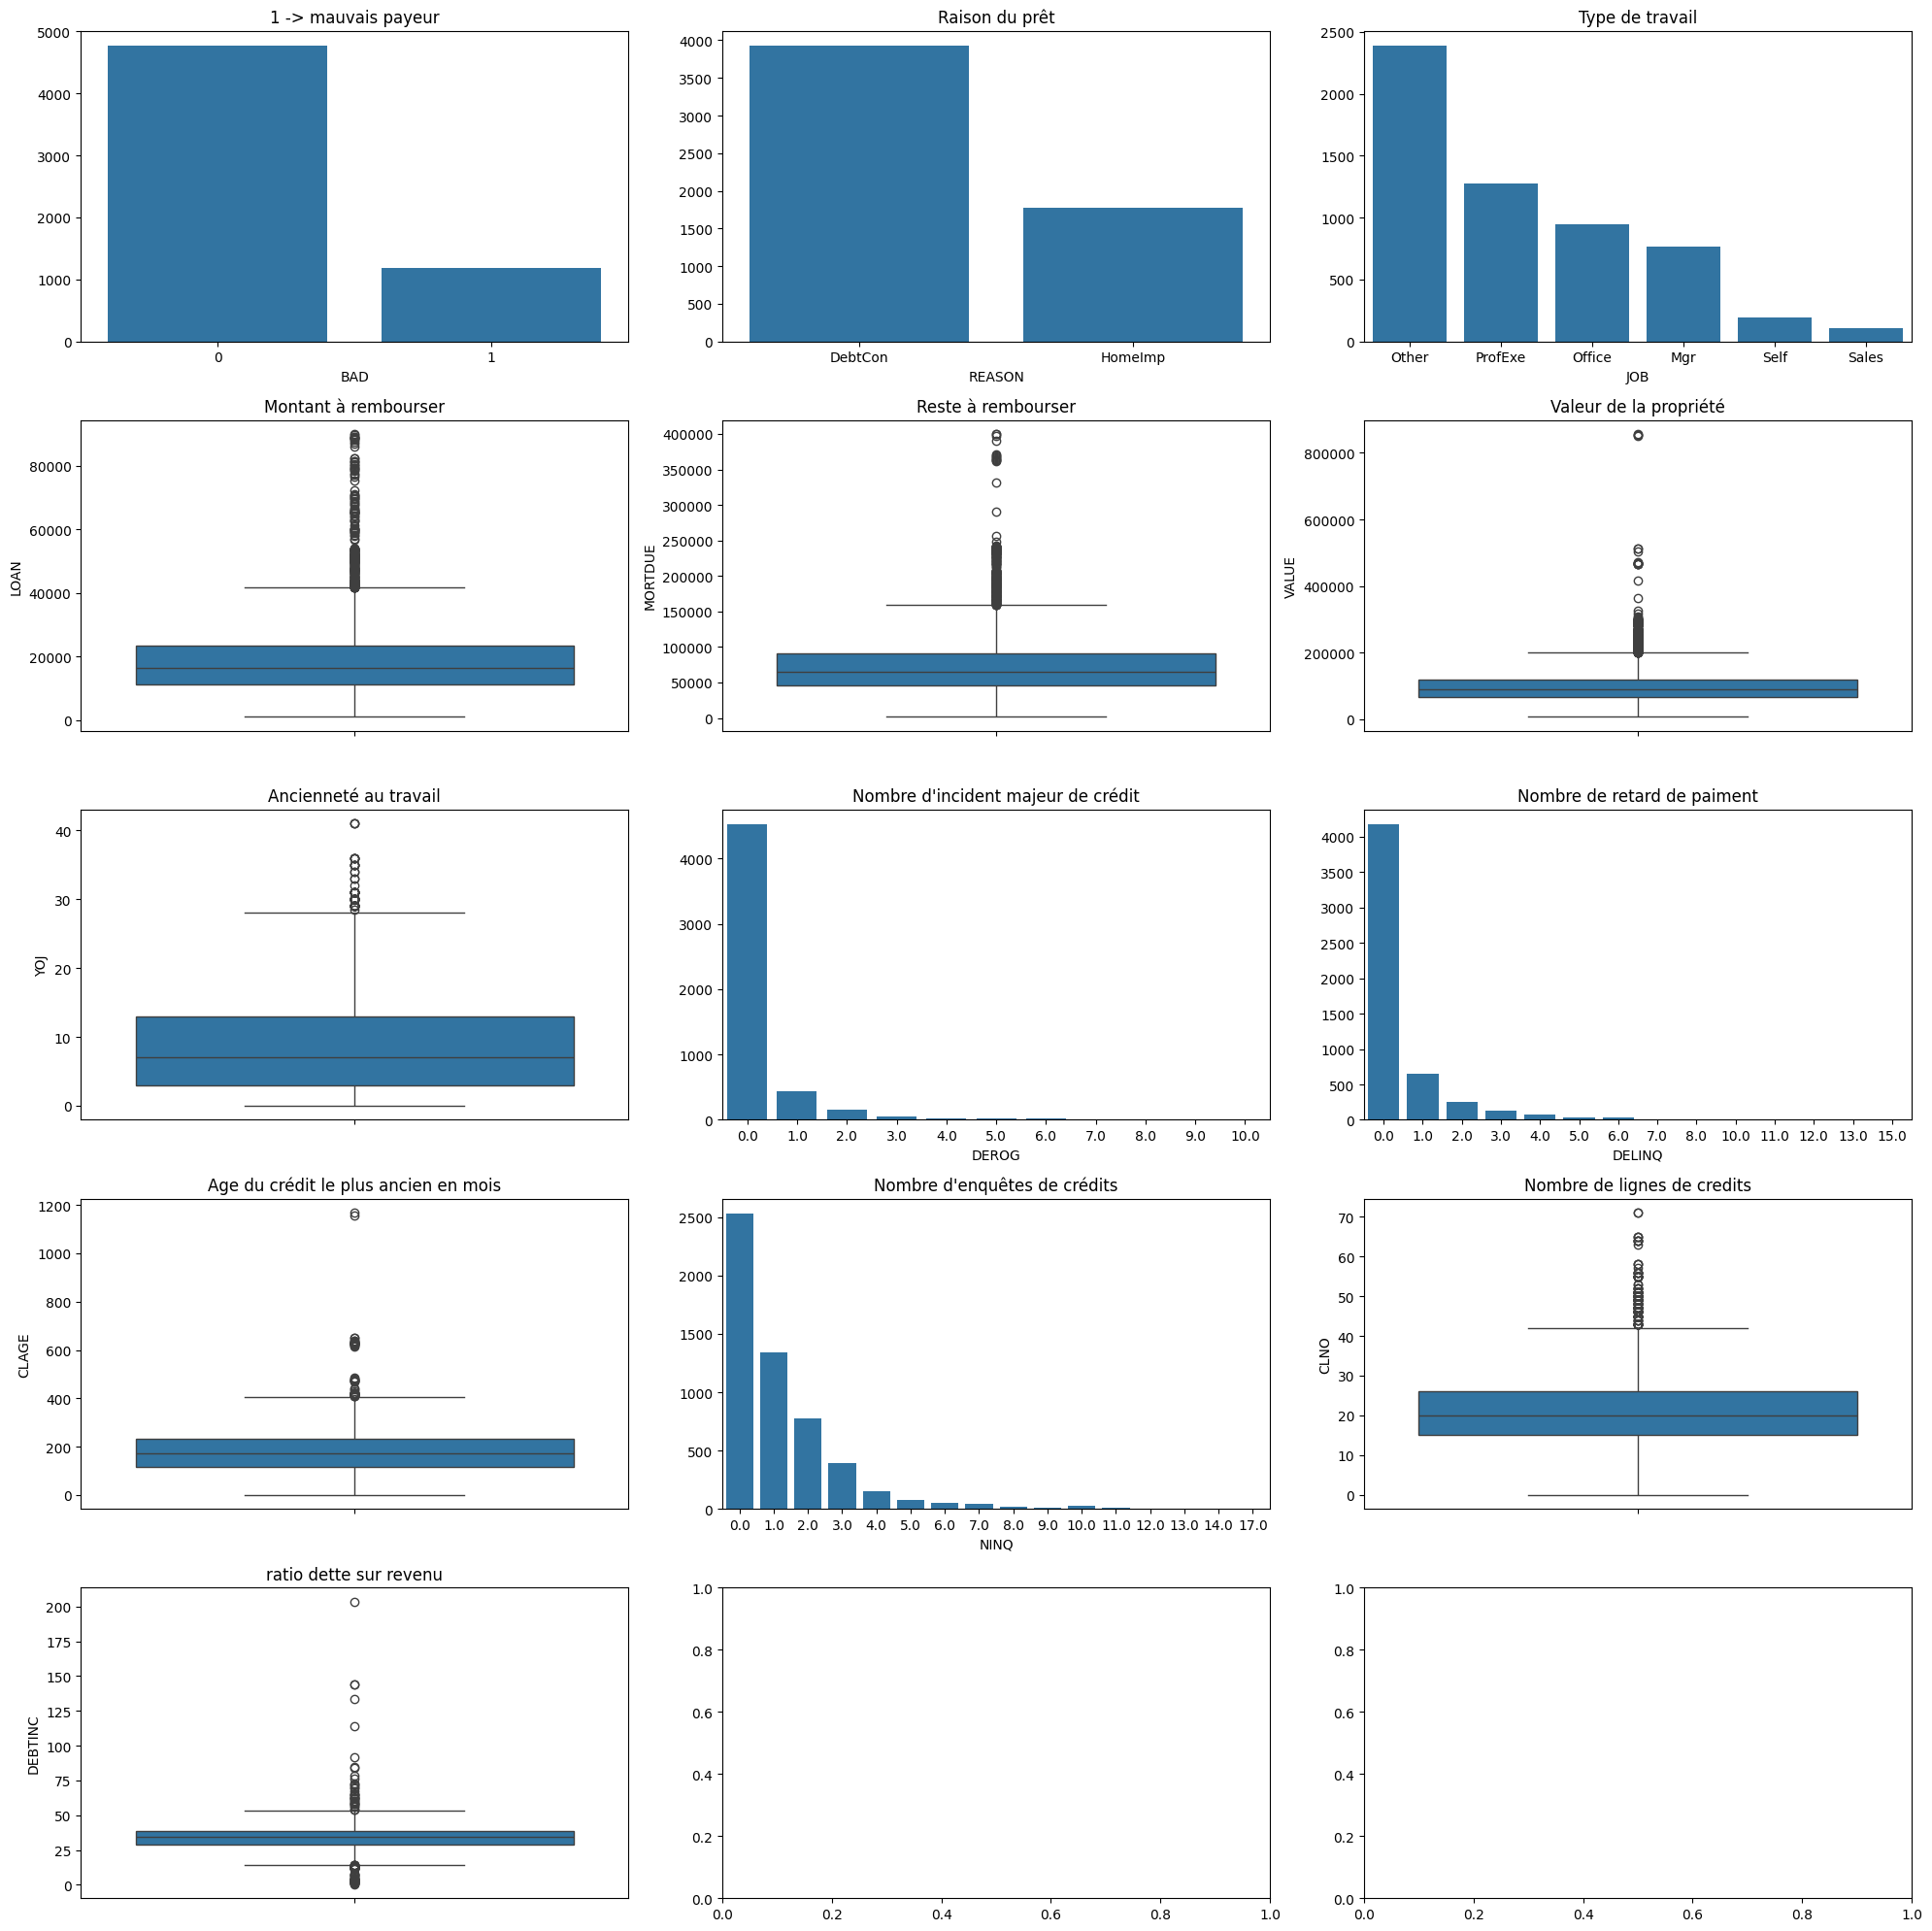

In [4]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20))

df1=data['BAD'].value_counts()
sns.barplot(x=df1.index, y=df1.values, ax=axes[0,0])
axes[0,0].set_title('1 -> mauvais payeur')

df2=data['REASON'].value_counts()
sns.barplot(x=df2.index, y=df2.values, ax=axes[0,1])
axes[0,1].set_title('Raison du prêt')

df3=data['JOB'].value_counts()
sns.barplot(x=df3.index, y=df3.values, ax=axes[0,2])
axes[0,2].set_title('Type de travail')

sns.boxplot(y=data['LOAN'],ax=axes[1,0])
axes[1,0].set_title('Montant à rembourser')

sns.boxplot(y=data['MORTDUE'],ax=axes[1,1])
axes[1,1].set_title('Reste à rembourser')

sns.boxplot(y=data['VALUE'],ax=axes[1,2])
axes[1,2].set_title('Valeur de la propriété')

sns.boxplot(y=data['YOJ'],ax=axes[2,0])
axes[2,0].set_title('Ancienneté au travail')

df5=data['DEROG'].value_counts()
sns.barplot(x=df5.index, y=df5.values, ax=axes[2,1])
axes[2,1].set_title("Nombre d'incident majeur de crédit")

df6=data['DELINQ'].value_counts()
sns.barplot(x=df6.index, y=df6.values, ax=axes[2,2])
axes[2,2].set_title('Nombre de retard de paiment')

sns.boxplot(y=data['CLAGE'],ax=axes[3,0])
axes[3,0].set_title('Age du crédit le plus ancien en mois')

df7=data['NINQ'].value_counts()
sns.barplot(x=df7.index, y=df7.values, ax=axes[3,1])
axes[3,1].set_title("Nombre d'enquêtes de crédits")

sns.boxplot(y=data['CLNO'],ax=axes[3,2])
axes[3,2].set_title('Nombre de lignes de credits')

sns.boxplot(y=data['DEBTINC'],ax=axes[4,0])
axes[4,0].set_title('ratio dette sur revenu')

plt.tight_layout()
plt.show()


# Matrice de correlation

<Axes: >

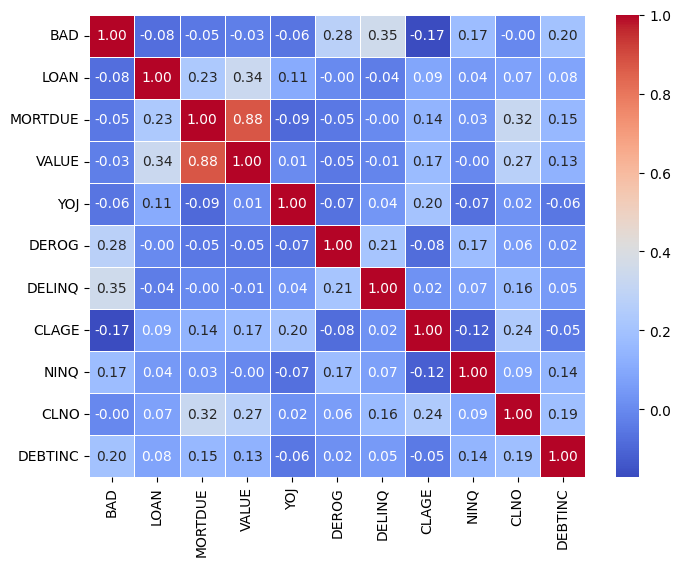

In [5]:

data_num=data.select_dtypes(include=["float","int"])

correlation_matrix=data_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Analyse de la covariance pour les variables catégorielles

<Axes: xlabel='REASON', ylabel='count'>

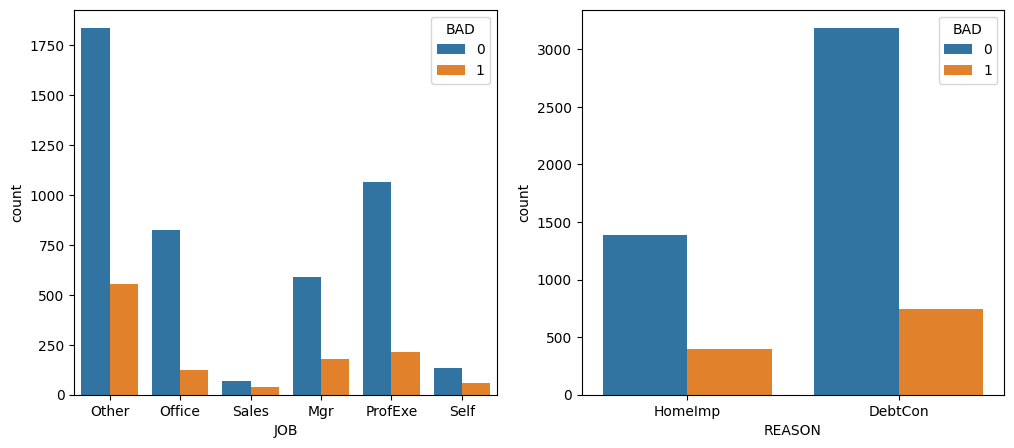

In [6]:
data_cat=pd.concat([data.select_dtypes(include='object'),data_num['BAD']],axis=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='JOB', hue='BAD', data=data_cat,ax=axes[0])
sns.countplot(x='REASON', hue='BAD', data=data_cat,ax=axes[1])

C'est compliqué d'analyser ces barplots sans pourcentage, de plus certaines valeurs par exemple pour JOB sont sous-représentés donc potentiellement pas pertinent de les analyser

# On va maintenant analyser le nombres de valeurs manquantes par colonnes et par lignes 

In [7]:
# Compter les valeurs manquantes par colonne
missing_by_column = data.isnull().sum()

nombre_lignes=len(data)
print(((missing_by_column/nombre_lignes)*100))

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64


0        1
1        1
2        1
3       11
4        1
        ..
5955     0
5956     0
5957     0
5958     0
5959     0
Length: 5960, dtype: int64


<Axes: xlabel='None'>

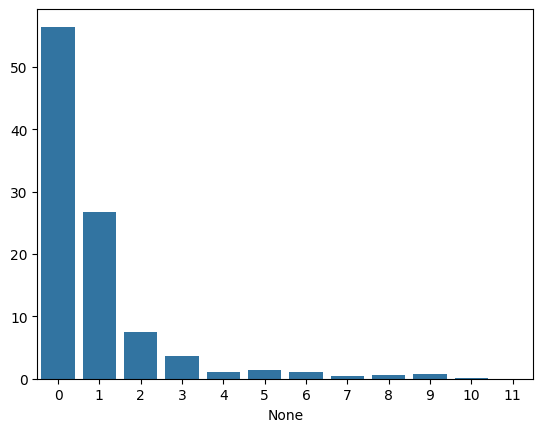

In [8]:
# Compter les valeurs manquantes par ligne
missing_by_row = data.isnull().sum(axis=1)

# Afficher le résultat
print(missing_by_row)

df=((missing_by_row.value_counts())/len(data))*100
sns.barplot(x=df.index,y=df.values)

Pites pour la suite :
- Ne pour l'instant travailler uniquement avec les variables numériques à forte corrélation (derog,delinq,clage,ninc,debtinc)
- Regarder entre eux la colinéarité
- enlever les lignes avec 3 val manquantes ou pls
- imputer le reste par la medianne
- regarder si il est pertinent pour certaines de ces variables de modifier les valeurs prises car certaines fois pas assez de données 

# test avec uniquement les variables à fortes correlation

In [22]:
data_1=data[['DEROG','DELINQ','CLAGE','NINQ','DEBTINC']]

print(len(data_1))

#On enelève les lignes avec beaucoup de NA 
missing_by_row = data_1.isnull().sum(axis=1)
for i in range(len(missing_by_row)):
    if missing_by_row[i]>=3  :
        data_1=data_1.drop(i)


5960
0       1
1       1
2       1
3       5
4       1
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Length: 5960, dtype: int64
5
5558
